## Split Analysis
### Brandon Onyejekwe
### Created 7/10/2021

## 2021 NCAA Championships

In [1]:
import re
import requests
from bs4 import BeautifulSoup
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#url = 'https://results.usatf.org/'
url1 = 'https://www.flashresults.com/2021_Meets/Outdoor/06-09_NCAA/004-1-01.htm' #M semi 1
url2 = 'https://www.flashresults.com/2021_Meets/Outdoor/06-09_NCAA/004-1-02.htm' #M semi 2
url3 = 'https://www.flashresults.com/2021_Meets/Outdoor/06-09_NCAA/004-1-03.htm' #M semi 3
url4 = 'https://www.flashresults.com/2021_Meets/Outdoor/06-09_NCAA/004-2-01.htm' #M final
url5 = 'https://www.flashresults.com/2021_Meets/Outdoor/06-09_NCAA/024-1-01.htm' #F semi 1
url6 = 'https://www.flashresults.com/2021_Meets/Outdoor/06-09_NCAA/024-1-02.htm' #F semi 2
url7 = 'https://www.flashresults.com/2021_Meets/Outdoor/06-09_NCAA/024-1-03.htm' #F semi 3
url8 = 'https://www.flashresults.com/2021_Meets/Outdoor/06-09_NCAA/024-2-01.htm' #F final

In [2]:
def time_conv(time):
    """Convert string times to float seconds (format: 'm:s.s' or 's.d')"""
    if ':' in time:
        mins, secs = time.split(':')
        return float(int(mins)*60 + float(secs))
    else:
        return float(time)
    
def get_data(url, g):
    """Web scrape time data from a specific race"""
    response = requests.get(url)
    soup = BeautifulSoup(response.text, 'html.parser')
    
    t = [str(e) for e in soup.findAll('td') if '[' in str(e)] #each element with data in brackets
    t2 = [f.split('[')[1].split(']')[0] for f in t] #get data b/w brackets (every third has grade of runner)
    t3 = [t2[i] for i in range(len(t2)) if i % 3 != 0] #get rid of grades, only splits left
    t4 = [ (time_conv(t3[i]), time_conv(t3[i+1]), g ) for i in range(0, len(t3), 2) if i+1 < len(t3)]
    return t4

In [5]:
url = [url1, url2, url3, url4, url5, url6, url7, url8]
g = ['M', 'M', 'M', 'M', 'F', 'F', 'F', 'F']
data = []
for i in range(len(url)):
    data += get_data(url[i], g[i])
    print(f'{i+1} races done...')
print('complete:', data)
df = pd.DataFrame(data, columns=['split1', 'split2', 'G'])

1 races done...
2 races done...
3 races done...
4 races done...
5 races done...
6 races done...
7 races done...
8 races done...
complete: [(52.39, 54.52, 'M'), (52.46, 54.46, 'M'), (52.65, 54.82, 'M'), (52.01, 56.14, 'M'), (52.88, 55.41, 'M'), (53.19, 55.34, 'M'), (52.22, 56.73, 'M'), (52.78, 60.87, 'M'), (53.61, 53.67, 'M'), (53.44, 53.87, 'M'), (53.01, 54.42, 'M'), (53.22, 54.28, 'M'), (53.64, 55.29, 'M'), (53.81, 55.26, 'M'), (53.42, 58.65, 'M'), (52.36, 55.44, 'M'), (52.8, 55.1, 'M'), (52.52, 55.4, 'M'), (52.52, 55.64, 'M'), (52.54, 55.92, 'M'), (52.31, 57.48, 'M'), (53.08, 57.31, 'M'), (53.01, 57.5, 'M'), (50.97, 53.72, 'M'), (50.94, 54.03, 'M'), (52.12, 53.64, 'M'), (51.75, 54.05, 'M'), (52.48, 53.86, 'M'), (52.31, 54.39, 'M'), (51.88, 54.88, 'M'), (52.0, 54.76, 'M'), (52.23, 54.71, 'M'), (58.19, 63.64, 'F'), (58.42, 63.83, 'F'), (58.56, 64.02, 'F'), (58.04, 65.85, 'F'), (58.78, 66.14, 'F'), (59.79, 66.95, 'F'), (63.9, 72.0, 'F'), (61.91, 71.17, 'F'), (59.96, 63.21, 'F'), (59.71,

In [6]:
df['diff'] = df['split1'] - df['split2'] # positive (split) if second half slower
df['time'] = df['split1'] + df['split2'] # total race time
df

,split1,split2,G,diff,time
0,52.39,54.52,M,-2.13,106.91
1,52.46,54.46,M,-2.00,106.92
2,52.65,54.82,M,-2.17,107.47
3,52.01,56.14,M,-4.13,108.15
4,52.88,55.41,M,-2.53,108.29
...,...,...,...,...,...
61,58.22,64.62,F,-6.40,122.84
62,58.27,64.58,F,-6.31,122.85
63,58.52,64.46,F,-5.94,122.98
64,57.63,66.47,F,-8.84,124.10


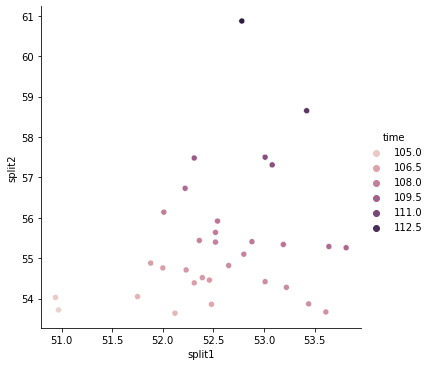

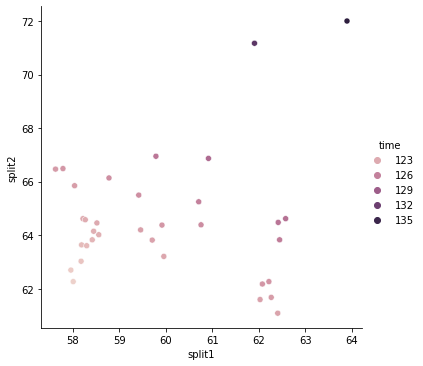

In [7]:
M = df[df['G'] == 'M']
F = df[df['G'] == 'F']
sns.relplot(data=M, x='split1', y='split2', hue='time')
sns.relplot(data=F, x='split1', y='split2', hue='time')
#sns.relplot(data=df, x='split1', y='split2', hue='G', size='time')

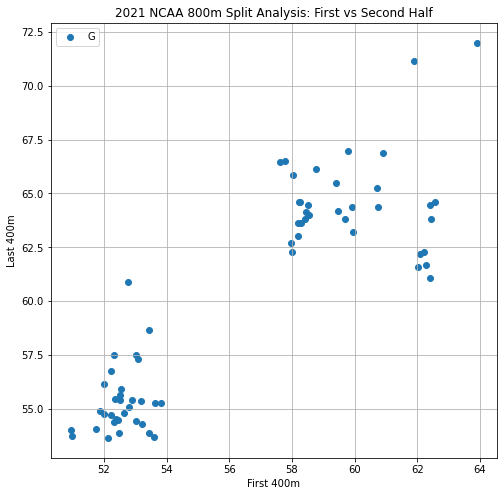

In [8]:
def event_plot(df):
    plt.figure(figsize=(8,8))
    plt.scatter(df['split1'], df['split2'], label='G')
#    plt.scatter(second['year'], second['result'], label='s', color='grey')
    plt.title(f'2021 NCAA 800m Split Analysis: First vs Second Half')
    plt.xlabel('First 400m')
    plt.ylabel('Last 400m')
    plt.legend()
    plt.grid()
    
event_plot(df)

## All Time 4x400m Races

In [9]:
url_1 = 'http://www.alltime-athletics.com/m4x400ok.htm'
url_2 = 'http://www.alltime-athletics.com/w4x400ok.htm'

In [20]:
response = requests.get(url_1) #url_2
soup = BeautifulSoup(response.text)

s = str(soup.findAll('pre')[0]).split('\n')
s[:20]

['<pre>',
 '        1      2:54.29    United States                      1           Stuttgart                22.08.1993',
 '',
 '                          Andrew Valmon                       (44.5)     01.01.65                 USA',
 '                          Quincy Watts                        (43.6)     19.06.70                 USA',
 '                          Harry Reynolds                      (43.23)    08.06.64                 USA',
 '                          Michael Johnson                     (42.94)    13.09.67                 USA',
 '',
 '        2      2:55.39    United States                      1           Beijing                  23.08.2008',
 '',
 '                          LaShawn Merritt                     (44.35e)   27.06.86                 USA',
 '                          Angelo Taylor                       (43.70e)   29.12.78                 USA',
 '                          David Neville                       (44.16)    01.06.84                 USA',
 '     

In [21]:
def get_df(s):
    i = 0
    records = []
    while i + 7 < len(s):
        race = []
        i += 1
        #print(i)
        #print('i:', s[i])
        #race += [s[i]]
        if '(' in s[i+2] and '(' in s[i+3] and '(' in s[i+4] and '(' in s[i+5]:
            for j in [i+2, i+3, i+4, i+5]:
                #print(s[j])
                time = s[j].split('(')[1].split(')')[0]
                time = float(re.sub('[a-zA-Z]', '', time))
                #time = float(re.sub('[,]', '[.]', time))
                #print(time)
                race += [time]
                #print(race)
        records += [race]
        i += 6
    return records
    
df = get_df(s)
df = [e for e in df if len(e) > 0 ]
df = pd.DataFrame(df, columns = ['leadoff', 'second', 'third', 'anchor'])
df[:15]

,leadoff,second,third,anchor
0,44.50,43.60,43.23,42.94
1,44.35,43.70,44.16,43.18
2,44.40,43.70,44.32,43.10
3,44.40,43.10,44.70,43.40
4,44.50,43.60,43.98,43.83
5,44.62,43.84,43.66,43.87
6,45.00,43.20,43.90,44.10
7,43.79,43.69,44.74,43.94
8,44.92,44.19,43.62,43.87
9,44.80,44.20,44.08,43.57


In [22]:
d = df
d['half1'] = d['leadoff'] + d['second']
d['half2'] = d['third'] + d['anchor']
d['total'] = d['half1'] + d['half2']
d['hdiff'] = d['half1']  - d['half2'] #start was _ faster than end
d['hd'] = d['hdiff'] / abs(d['hdiff'])
d

,leadoff,second,third,anchor,half1,half2,total,hdiff,hd
0,44.50,43.60,43.23,42.94,88.10,86.17,174.27,1.93,1.0
1,44.35,43.70,44.16,43.18,88.05,87.34,175.39,0.71,1.0
2,44.40,43.70,44.32,43.10,88.10,87.42,175.52,0.68,1.0
3,44.40,43.10,44.70,43.40,87.50,88.10,175.60,-0.60,-1.0
4,44.50,43.60,43.98,43.83,88.10,87.81,175.91,0.29,1.0
...,...,...,...,...,...,...,...,...,...
1203,46.70,45.80,46.20,44.90,92.50,91.10,183.60,1.40,1.0
1204,46.40,46.20,45.20,45.50,92.60,90.70,183.30,1.90,1.0
1205,46.40,45.50,46.21,45.42,91.90,91.63,183.53,0.27,1.0
1206,46.40,45.80,45.45,45.94,92.20,91.39,183.59,0.81,1.0


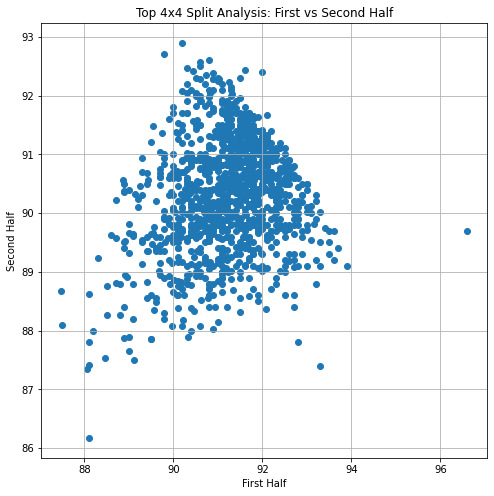

In [24]:
def event_plot(df):
    #x = 
    plt.figure(figsize=(8,8))
    plt.scatter(d['half1'], d['half2'])
#    plt.scatter(second['year'], second['result'], label='s', color='grey')
    plt.title(f'Top 4x4 Split Analysis: First vs Second Half')
    plt.xlabel('First Half')
    plt.ylabel('Second Half')
    #plt.plot()
    #plt.legend()
    plt.grid()
    
event_plot(d)

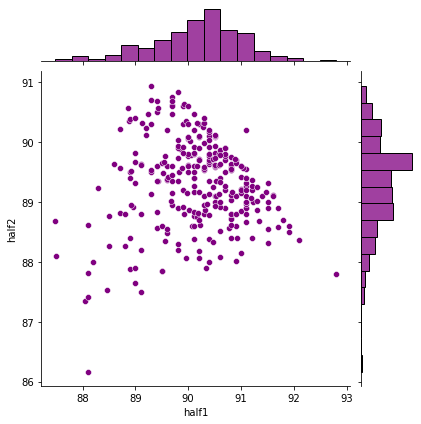

In [25]:
test = d[:300]
sns.jointplot(x='half1', y='half2', data=test, color='purple')